## Step 1 : Import Libraries & Set Up Environment

In [2]:
# Step 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set plotting style
sns.set(style="whitegrid")

print("✅ Libraries Imported Successfully!")


✅ Libraries Imported Successfully!


## Step 2 : Load the Dataset

In [3]:
# Step 2: Load Dataset
df = pd.read_csv("athlete_injury_risk_dataset.csv")

print("✅ Dataset Loaded Successfully!")


✅ Dataset Loaded Successfully!


## Step 3 : View Basic Information

In [4]:
# Step 3: Dataset Overview
print("📌 Dataset Shape:", df.shape)

print("\n📌 First 5 Rows:")
display(df.head())

print("\n📌 Data Types:")
print(df.dtypes)

print("\n📌 Missing Values:")
print(df.isnull().sum())


📌 Dataset Shape: (1000, 8)

📌 First 5 Rows:


,Player_ID,Age,Games_Played_Last_Month,Avg_Training_Hours_Per_Week,Fitness_Score,Avg_Recovery_Days,Injury_History_Count,Injury_Next_Game
0,P0001,24,7,4.6,50,3,1,1
1,P0002,37,9,2.1,74,1,0,0
2,P0003,32,19,16.7,47,3,4,0
3,P0004,28,14,13.8,42,0,1,0
4,P0005,25,14,15.7,53,2,3,0



📌 Data Types:
Player_ID                       object
Age                              int64
Games_Played_Last_Month          int64
Avg_Training_Hours_Per_Week    float64
Fitness_Score                    int64
Avg_Recovery_Days                int64
Injury_History_Count             int64
Injury_Next_Game                 int64
dtype: object

📌 Missing Values:
Player_ID                      0
Age                            0
Games_Played_Last_Month        0
Avg_Training_Hours_Per_Week    0
Fitness_Score                  0
Avg_Recovery_Days              0
Injury_History_Count           0
Injury_Next_Game               0
dtype: int64


## Step 4 : Describe the Numerical Columns

In [5]:
# Step 4: Descriptive Stats
df.describe()

,Age,Games_Played_Last_Month,Avg_Training_Hours_Per_Week,Fitness_Score,Avg_Recovery_Days,Injury_History_Count,Injury_Next_Game
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,28.231000,9.461000,13.302400,69.682000,4.55500,2.047000,0.299000
std,6.538378,5.725142,6.666722,17.352175,2.89229,1.394538,0.458049
min,18.000000,0.000000,2.000000,40.000000,0.00000,0.000000,0.000000
25%,22.000000,4.000000,7.400000,55.000000,2.00000,1.000000,0.000000
50%,28.000000,10.000000,13.250000,69.000000,5.00000,2.000000,0.000000
75%,34.000000,14.000000,19.125000,85.000000,7.00000,3.000000,1.000000
max,39.000000,19.000000,25.000000,99.000000,9.00000,4.000000,1.000000


## Step 5 : Unique Values in Categorical Columns

In [32]:
# Step 5: Unique Values and Counts for Categorical Columns
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    unique_vals = df[col].unique()
    print(f"\n🔸 {col} -> {len(unique_vals)} unique values")
    print(unique_vals)



🔸 Player_ID -> 1000 unique values
['P0001' 'P0002' 'P0003' 'P0004' 'P0005' 'P0006' 'P0007' 'P0008' 'P0009'
 'P0010' 'P0011' 'P0012' 'P0013' 'P0014' 'P0015' 'P0016' 'P0017' 'P0018'
 'P0019' 'P0020' 'P0021' 'P0022' 'P0023' 'P0024' 'P0025' 'P0026' 'P0027'
 'P0028' 'P0029' 'P0030' 'P0031' 'P0032' 'P0033' 'P0034' 'P0035' 'P0036'
 'P0037' 'P0038' 'P0039' 'P0040' 'P0041' 'P0042' 'P0043' 'P0044' 'P0045'
 'P0046' 'P0047' 'P0048' 'P0049' 'P0050' 'P0051' 'P0052' 'P0053' 'P0054'
 'P0055' 'P0056' 'P0057' 'P0058' 'P0059' 'P0060' 'P0061' 'P0062' 'P0063'
 'P0064' 'P0065' 'P0066' 'P0067' 'P0068' 'P0069' 'P0070' 'P0071' 'P0072'
 'P0073' 'P0074' 'P0075' 'P0076' 'P0077' 'P0078' 'P0079' 'P0080' 'P0081'
 'P0082' 'P0083' 'P0084' 'P0085' 'P0086' 'P0087' 'P0088' 'P0089' 'P0090'
 'P0091' 'P0092' 'P0093' 'P0094' 'P0095' 'P0096' 'P0097' 'P0098' 'P0099'
 'P0100' 'P0101' 'P0102' 'P0103' 'P0104' 'P0105' 'P0106' 'P0107' 'P0108'
 'P0109' 'P0110' 'P0111' 'P0112' 'P0113' 'P0114' 'P0115' 'P0116' 'P0117'
 'P0118' 'P0119'

## Step 6 : Handle Missing Values & Clean the Dataset
## Step 6.1 : Check for Missing Values

In [7]:
# Step 6.1: Check for missing values
missing = df.isnull().sum()

print("🔎 Missing Values Summary:")
print(missing[missing > 0])


🔎 Missing Values Summary:
Series([], dtype: int64)


## Step 6.2: Handle Missing Values

In [8]:
# Step 6.2: Handle missing values

# For numeric columns – fill with median
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# For categorical columns – fill with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("✅ Missing values handled successfully!")


✅ Missing values handled successfully!


## Step 6.3 : Remove Duplicates

In [9]:
# Step 6.3: Remove duplicate rows if any
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]

print(f"🧹 Removed {before - after} duplicate rows.")


🧹 Removed 0 duplicate rows.


## Step 6.4: Normalize Categorical Entries

In [10]:
# Step 6.4: Normalize gender and similar columns
if 'gender' in df.columns:
    df['gender'] = df['gender'].str.strip().str.lower()

print("🔤 Normalization of text columns done.")


🔤 Normalization of text columns done.


## Step 7: Exploratory Data Analysis (EDA)
## Step 7.1: Visualize the Distribution of Key Features

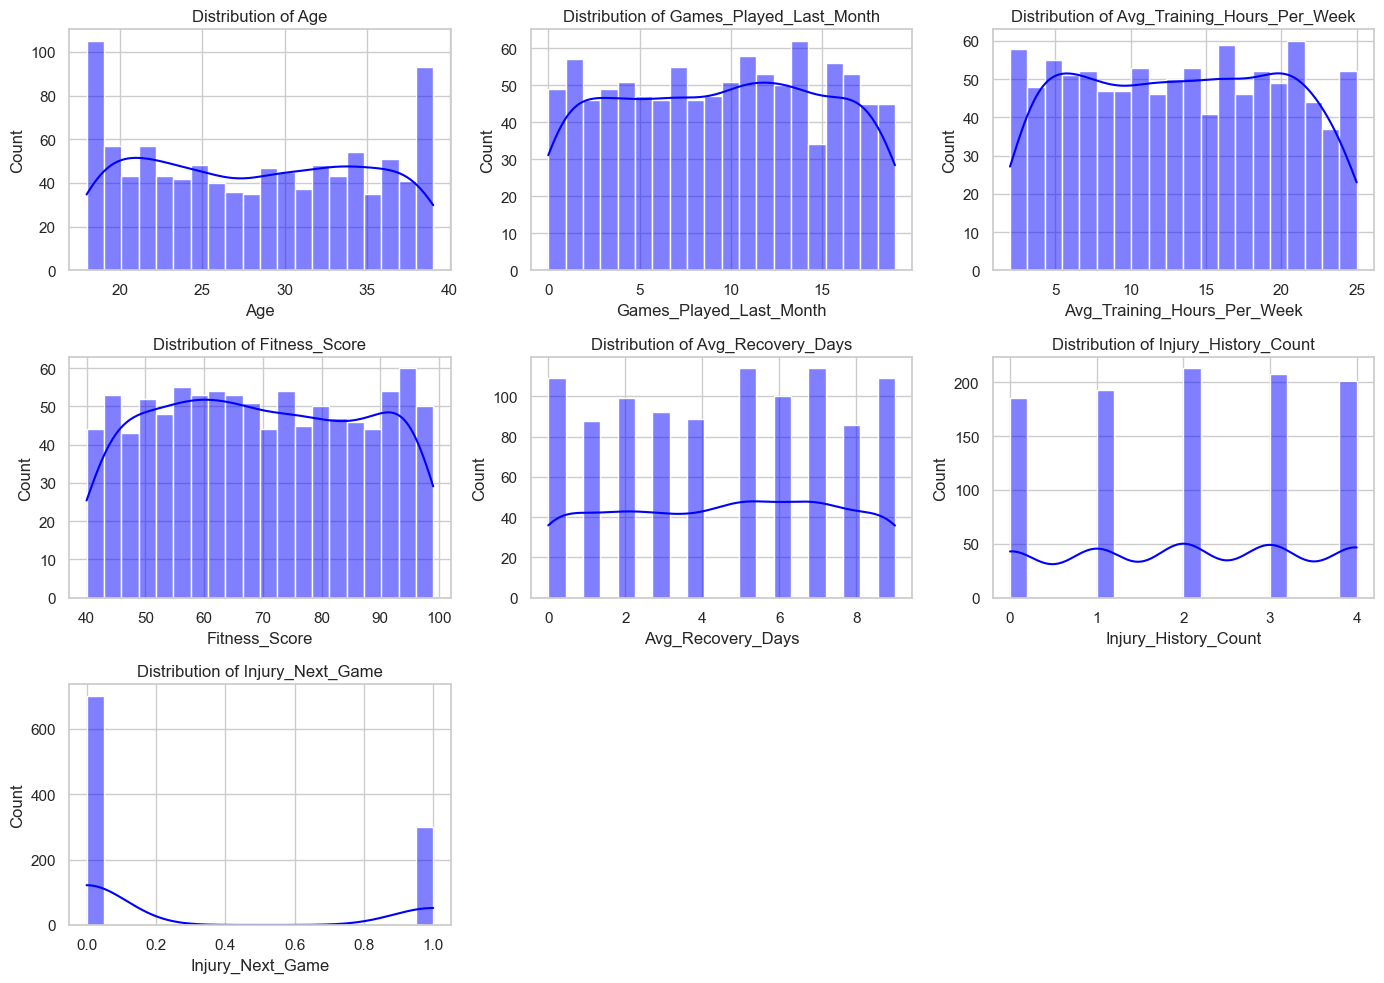

✅ Distribution of key numerical features plotted!


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 7.1: Visualize distributions of key numerical features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

print("✅ Distribution of key numerical features plotted!")


## Step 7.2: Check Correlations Between Numerical Features

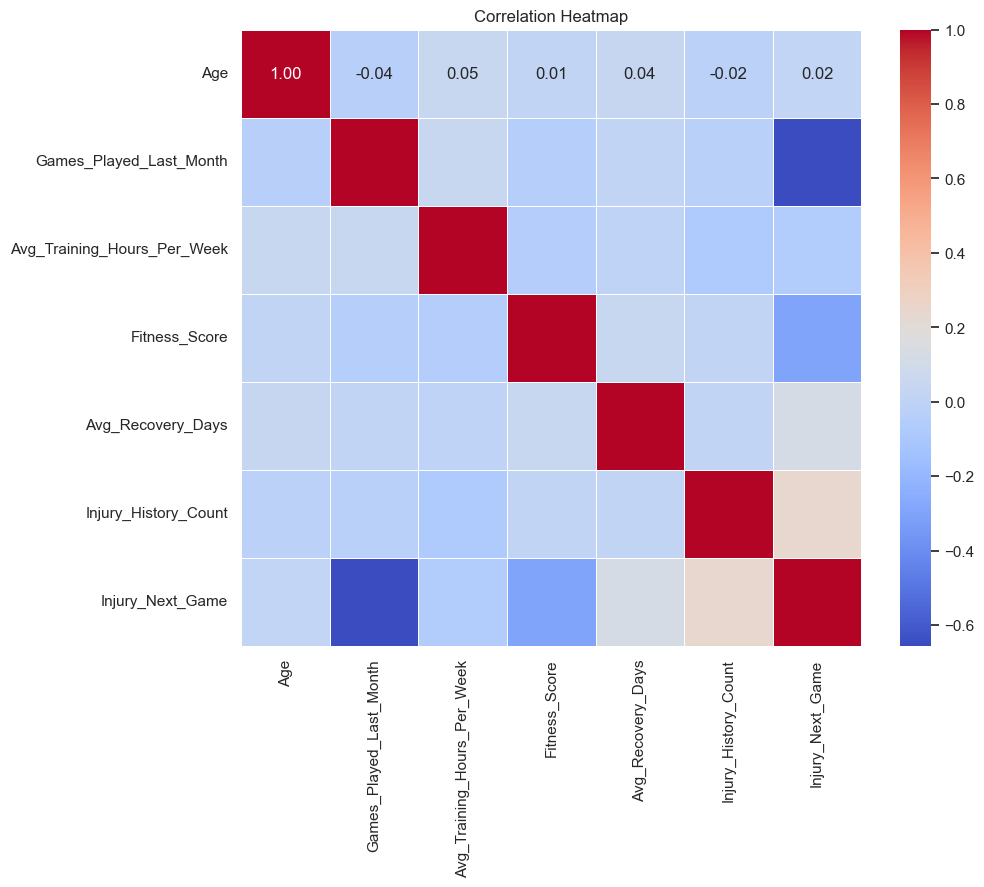

✅ Correlation heatmap plotted!


In [12]:
# Step 7.2: Correlation heatmap
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

print("✅ Correlation heatmap plotted!")


## Step 7.3: Visualize Categorical Features

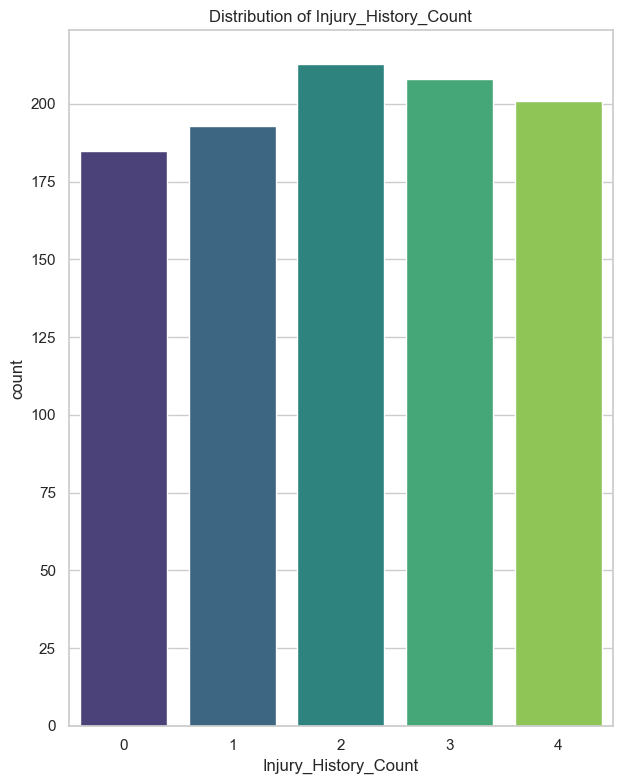

✅ Categorical feature distributions visualized!


In [13]:
# Step 7.3: Visualize categorical features (Injury_History_Count, Injury_Next_Game)
categorical_cols = ['Injury_History_Count']  # Using relevant categorical columns

plt.figure(figsize=(12, 8))

# Loop through the categorical columns to visualize their distributions
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 2, i)  # 1 row and 2 columns for better visualization
    sns.countplot(x=df[col], palette='viridis')  # Countplot to visualize categorical distribution
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

print("✅ Categorical feature distributions visualized!")


## Step 7.4: Visualize Injury Risk Distribution

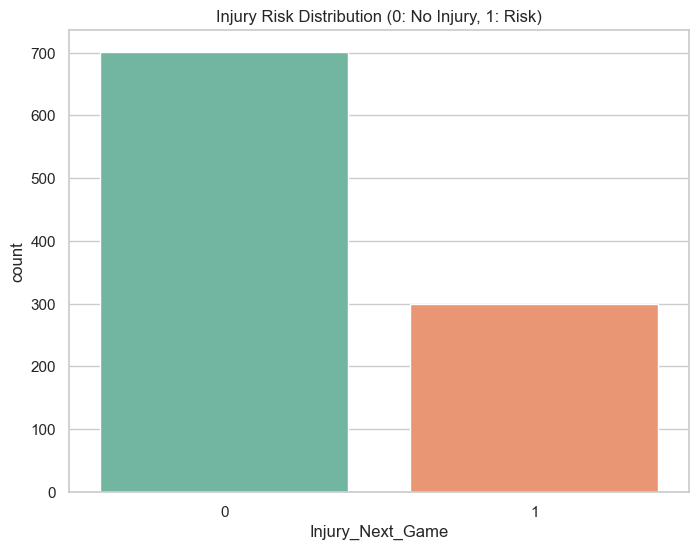

✅ Injury risk distribution visualized!


In [14]:
# Step 7.4: Visualize the distribution of injury risk (target variable)
# Assuming 'Injury_Next_Game' is the target variable (0 = no injury, 1 = risk of injury)
plt.figure(figsize=(8, 6))
sns.countplot(x='Injury_Next_Game', data=df, palette='Set2')
plt.title("Injury Risk Distribution (0: No Injury, 1: Risk)")
plt.show()

print("✅ Injury risk distribution visualized!")


## Step 8: Feature Engineering
## Step 8.1: Creating New Features

In [15]:
# Step 8.1: Create new features

# 1. Injury Frequency: Let's assume that 'Injury_History_Count' gives the number of past injuries.
#    We can create a feature reflecting the average injuries per month or similar metrics.
df['Injury_Frequency'] = df['Injury_History_Count'] / df['Age']  # Average injuries per year

# 2. Training Load: Let's calculate the training load based on the number of games played last month
# and the average training hours per week.
df['Training_Load'] = df['Games_Played_Last_Month'] * df['Avg_Training_Hours_Per_Week']

# 3. Recovery to Training Ratio: This feature compares the number of recovery days to training hours per week.
df['Recovery_to_Training_Ratio'] = df['Avg_Recovery_Days'] / df['Avg_Training_Hours_Per_Week']

# 4. Combine the features and check the resulting dataset.
print("\n📝 New Features Added:")
print(df[['Player_ID', 'Injury_Frequency', 'Training_Load', 'Recovery_to_Training_Ratio']].head())



📝 New Features Added:
  Player_ID  Injury_Frequency  Training_Load  Recovery_to_Training_Ratio
0     P0001          0.041667           32.2                    0.652174
1     P0002          0.000000           18.9                    0.476190
2     P0003          0.125000          317.3                    0.179641
3     P0004          0.035714          193.2                    0.000000
4     P0005          0.120000          219.8                    0.127389


## Step 8.2: Encoding Categorical Features

In [16]:
# Step 8.2: Encoding Categorical Variables (if any)

# Convert Player_ID to a numerical label (just an example, usually Player_ID doesn't need encoding)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Player_ID_Encoded'] = label_encoder.fit_transform(df['Player_ID'])

print("\n📝 Categorical Features Encoded:")
print(df[['Player_ID', 'Player_ID_Encoded']].head())



📝 Categorical Features Encoded:
  Player_ID  Player_ID_Encoded
0     P0001                  0
1     P0002                  1
2     P0003                  2
3     P0004                  3
4     P0005                  4


## Step 8.3: Scaling Numerical Features

In [17]:
# Step 8.3: Feature Scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# List of numerical columns to scale
numerical_columns = ['Age', 'Games_Played_Last_Month', 'Avg_Training_Hours_Per_Week', 
                     'Fitness_Score', 'Avg_Recovery_Days', 'Injury_History_Count', 
                     'Injury_Frequency', 'Training_Load', 'Recovery_to_Training_Ratio']

# Scale the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Show the first 5 rows of the scaled dataset
print("\n📝 Scaled Numerical Features:")
print(df[numerical_columns].head())



📝 Scaled Numerical Features:
        Age  Games_Played_Last_Month  Avg_Training_Hours_Per_Week  \
0  0.285714                 0.368421                     0.113043   
1  0.904762                 0.473684                     0.004348   
2  0.666667                 1.000000                     0.639130   
3  0.476190                 0.736842                     0.513043   
4  0.333333                 0.736842                     0.595652   

   Fitness_Score  Avg_Recovery_Days  Injury_History_Count  Injury_Frequency  \
0       0.169492           0.333333                  0.25          0.187500   
1       0.576271           0.111111                  0.00          0.000000   
2       0.118644           0.333333                  1.00          0.562500   
3       0.033898           0.000000                  0.25          0.160714   
4       0.220339           0.222222                  0.75          0.540000   

   Training_Load  Recovery_to_Training_Ratio  
0       0.068613                 

## Step 8.4: Handling Outliers

In [18]:
# Step 8.4: Handling Outliers (Example using IQR method)

Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
df_no_outliers = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check the shape of the dataframe after outlier removal
print("\n📝 Data after Outlier Removal:")
print(df_no_outliers.shape)



📝 Data after Outlier Removal:
(908, 12)


## Step 8.5: Final Feature Set

In [19]:
# Step 8.5: Prepare the final dataset
# Drop unnecessary columns like Player_ID if not needed for the model
final_df = df.drop(columns=['Player_ID'])

# Check the final dataset
print("\n📝 Final Dataset Ready for Modeling:")
print(final_df.head())



📝 Final Dataset Ready for Modeling:
        Age  Games_Played_Last_Month  Avg_Training_Hours_Per_Week  \
0  0.285714                 0.368421                     0.113043   
1  0.904762                 0.473684                     0.004348   
2  0.666667                 1.000000                     0.639130   
3  0.476190                 0.736842                     0.513043   
4  0.333333                 0.736842                     0.595652   

   Fitness_Score  Avg_Recovery_Days  Injury_History_Count  Injury_Next_Game  \
0       0.169492           0.333333                  0.25                 1   
1       0.576271           0.111111                  0.00                 0   
2       0.118644           0.333333                  1.00                 0   
3       0.033898           0.000000                  0.25                 0   
4       0.220339           0.222222                  0.75                 0   

   Injury_Frequency  Training_Load  Recovery_to_Training_Ratio  \
0      

## Step 9: Model Building.

## Step 9.1: Split the data into training and testing sets

In [38]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = final_df.drop(columns=['Injury_Next_Game'])
y = final_df['Injury_Next_Game']

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

print(f"\n📝 Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")


📝 Training set shape: (800, 10), Testing set shape: (200, 10)


## Step 9.2: Train a Logistic Regression Model (Baseline)

In [39]:
# Step 9.2: Train a Logistic Regression Model (Baseline)

from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Train the Logistic Regression model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg_model.predict(X_test)

print("\n✅ Logistic Regression Model Trained Successfully!")



✅ Logistic Regression Model Trained Successfully!


## Step 9.3: Train a Random Forest Classifier

In [40]:
# Step 9.3: Train a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

print("\n✅ Random Forest Classifier Model Trained Successfully!")



✅ Random Forest Classifier Model Trained Successfully!


## Step 9.4: Evaluate Models with Accuracy, Precision, Recall, F1-Score

In [41]:
# Step 9.4: Evaluate Models with Accuracy, Precision, Recall, F1-Score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Logistic Regression Evaluation
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

# Random Forest Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print Evaluation Results
print("\n📝 Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_log_reg * 100:.2f}%")
print(f"Precision: {precision_log_reg:.2f}")
print(f"Recall: {recall_log_reg:.2f}")
print(f"F1-Score: {f1_log_reg:.2f}")

print("\n📝 Random Forest Evaluation:")
print(f"Accuracy: {accuracy_rf * 100:.2f}%")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")

# Classification Report
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log_reg))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))



📝 Logistic Regression Evaluation:
Accuracy: 97.50%
Precision: 0.92
Recall: 1.00
F1-Score: 0.96

📝 Random Forest Evaluation:
Accuracy: 93.50%
Precision: 0.93
Recall: 0.85
F1-Score: 0.89

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       140
           1       0.92      1.00      0.96        60

    accuracy                           0.97       200
   macro avg       0.96      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       140
           1       0.93      0.85      0.89        60

    accuracy                           0.94       200
   macro avg       0.93      0.91      0.92       200
weighted avg       0.93      0.94      0.93       200



## Step 9.5: ROC-AUC Curve and Confusion Matrix

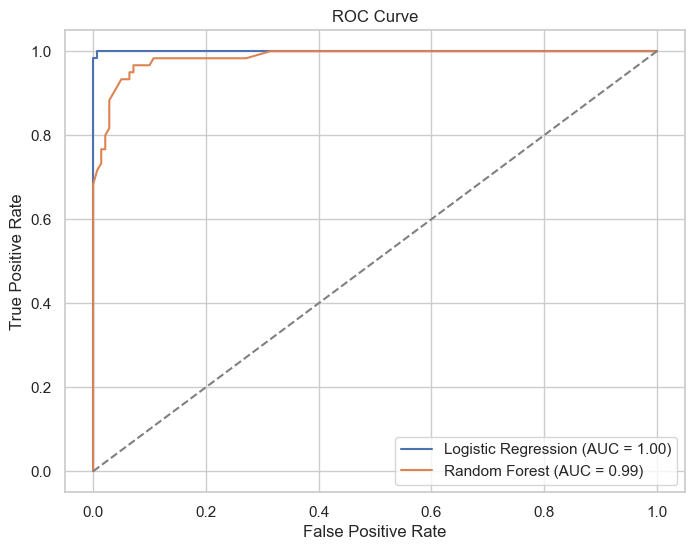

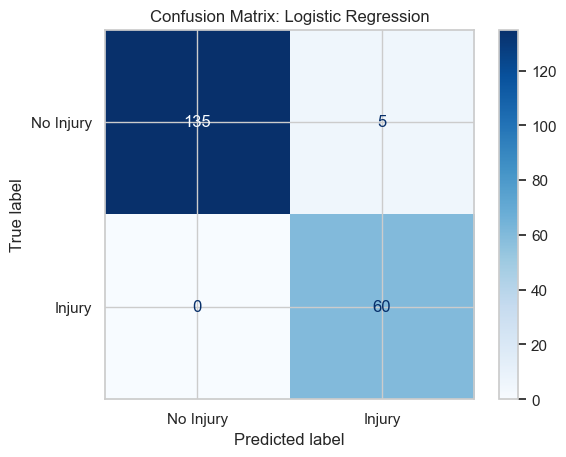

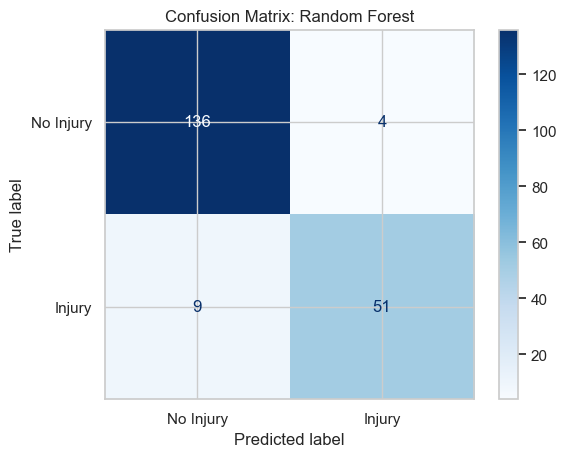

In [42]:
# Step 9.5: Plot ROC-AUC Curve and Confusion Matrix

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

# ROC-AUC for Logistic Regression
y_prob_log_reg = log_reg_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
roc_auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)

# ROC-AUC for Random Forest
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# ROC Curve Plot
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f"Logistic Regression (AUC = {roc_auc_log_reg:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Confusion Matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_display_log_reg = ConfusionMatrixDisplay(conf_matrix_log_reg, display_labels=["No Injury", "Injury"])
conf_matrix_display_log_reg.plot(cmap='Blues')
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_display_rf = ConfusionMatrixDisplay(conf_matrix_rf, display_labels=["No Injury", "Injury"])
conf_matrix_display_rf.plot(cmap='Blues')
plt.title("Confusion Matrix: Random Forest")
plt.show()


## Step 9.6: Feature Importance

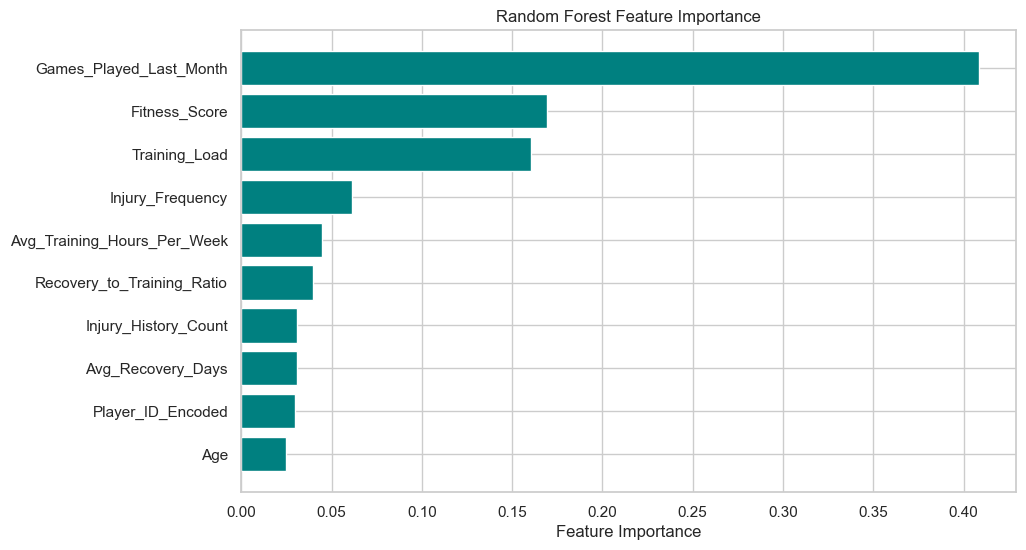

In [43]:
# Step 9.6: Display Feature Importance

# Get Feature Importance from the Random Forest Model
feature_importances = rf_model.feature_importances_

# Sort the feature importances in descending order
sorted_idx = feature_importances.argsort()

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx], color='teal')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


In [44]:
import joblib

# Save the Random Forest model
joblib.dump(rf_model, 'rf_model.pkl')

print("✅ Random Forest model saved as rf_model.pkl")


✅ Random Forest model saved as rf_model.pkl


In [45]:
# Save cleaned dataset to CSV
df.to_csv('cleaned_dataset.csv', index=False)

print("✅ Cleaned dataset saved as 'cleaned_dataset.csv'")


✅ Cleaned dataset saved as 'cleaned_dataset.csv'


In [28]:
print(X.columns.tolist())


['Age', 'Games_Played_Last_Month', 'Avg_Training_Hours_Per_Week', 'Fitness_Score', 'Avg_Recovery_Days', 'Injury_History_Count', 'Injury_Frequency', 'Training_Load', 'Recovery_to_Training_Ratio', 'Player_ID_Encoded']


In [34]:
print(df.columns.tolist())

['Player_ID', 'Age', 'Games_Played_Last_Month', 'Avg_Training_Hours_Per_Week', 'Fitness_Score', 'Avg_Recovery_Days', 'Injury_History_Count', 'Injury_Next_Game', 'Injury_Frequency', 'Training_Load', 'Recovery_to_Training_Ratio', 'Player_ID_Encoded']


In [35]:
print(df['Injury_Next_Game'].value_counts())

Injury_Next_Game
0    701
1    299
Name: count, dtype: int64


In [37]:
print("Input for prediction:")
print(X.columns)
print(X.dtypes)


Input for prediction:
Index(['Age', 'Games_Played_Last_Month', 'Avg_Training_Hours_Per_Week',
       'Fitness_Score', 'Avg_Recovery_Days', 'Injury_History_Count',
       'Injury_Frequency', 'Training_Load', 'Recovery_to_Training_Ratio',
       'Player_ID_Encoded'],
      dtype='object')
Age                            float64
Games_Played_Last_Month        float64
Avg_Training_Hours_Per_Week    float64
Fitness_Score                  float64
Avg_Recovery_Days              float64
Injury_History_Count           float64
Injury_Frequency               float64
Training_Load                  float64
Recovery_to_Training_Ratio     float64
Player_ID_Encoded                int64
dtype: object


In [46]:
# Temporary test to verify model isn't stuck
test_input_1 = np.array([[24, 5, 24, 31, 9.2, 7, 5.3, 62.9, 1.47, 1]])
test_input_2 = np.array([[20, 1, 10, 90, 2.0, 0, 0.1, 20.0, 0.8, 2]])
st.write("📌 Sanity Check - Test Prediction 1:", rf_model.predict_proba(test_input_1)[0][1])
st.write("📌 Sanity Check - Test Prediction 2:", rf_model.predict_proba(test_input_2)[0][1])


NameError: name 'st' is not defined